# Exploring Frogs Data

This dataset was optain from EY 2022 Better Working World Data Challenge Level 1: Local Frog Discovery Tool [here](https://challenge.ey.com/challenges/level-1-local-frog-discovery-tool-SXnArnHsm/data-description)

The dataset is a subset of the GBIF occurrence dataset which combines data from a wide array of sources, including specimen-related data from natural history museums, observations from citizen science networks, and automated environmental surveys. For our purposes, we are only interested in a narrow subset of the data relating to 9 selected frog species from Australia, Costa Rica, and South Africa. 

A large source of the Australian data is from a smartphone app called FrogID created by the Australian Museum. This app is free to download and enables citizens to record frog calls which are then classified in the app to tell the user the species. You can check it out [here](https://www.frogid.net.au/).

The frog species to identified is Litoria fallax, the eastern dwarf tree frog pictured below. 

<center>
<img src="pictures/Litoria_fallax.jpg" width="500" height="340">
</center>

Below we initialize and use the libraries necessary to unzip, loading and explore the data.

In [1]:
# Supress Warnings 
import warnings 
warnings.filterwarnings("ignore") 
#Unzip and Load Data   
import zipfile
import os
# Explore Data
import pandas as pd
import numpy as np
import datetime as dt
# Plotting
import matplotlib.pyplot as plt
# Geospatial
from itertools import cycle
import contextily as cx

Defined the path where the zip file is stored, and where the unzipped files where will store

In [2]:
data_path = '2022-Better-Working-World-Data-Challenge/notebooks/'
output_path = '2022-Better-Working-World-Data-Challenge/notebooks/dataset./output/'

Unzip the data obtain from "EY 2022 Challenge Level 1" 

In [3]:
if not os.path.exists(data_path+'training_data/'):
    os.mkdir(data_path+'/training_data/')
    with zipfile.ZipFile(data_path+'GBIF_training_data.zip', 'r') as zip_ref:
        zip_ref.extractall(data_path+'/training_data/')

Loading and store the data as a dataframe in the variable frogs

In [4]:
frogs = pd.read_csv(data_path+'training_data/occurrence.txt', sep='\t', parse_dates=['eventDate'])
frogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193791 entries, 0 to 193790
Columns: 257 entries, gbifID to iucnRedListCategory
dtypes: bool(2), datetime64[ns](1), float64(104), int64(11), object(139)
memory usage: 377.4+ MB


In [5]:
frogs.head()

,gbifID,abstract,accessRights,accrualMethod,accrualPeriodicity,accrualPolicy,alternative,audience,available,bibliographicCitation,...,relativeOrganismQuantity,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name,iucnRedListCategory
0,2574007008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,AUS,Australia,AUS.5_1,New South Wales,AUS.5.110_1,Port Stephens,NaN,NaN,LC
1,3457021422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,CRI,Costa Rica,CRI.6_1,Puntarenas,CRI.6.7_1,Golfito,NaN,NaN,LC
2,1571195309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,CRI,Costa Rica,CRI.4_1,Heredia,CRI.4.10_1,Sarapiquí,NaN,NaN,LC
3,2265778539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,CRI,Costa Rica,CRI.6_1,Puntarenas,CRI.6.6_1,Garabito,NaN,NaN,LC
4,3407962690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,AUS,Australia,AUS.7_1,Queensland,AUS.7.62_1,Sunshine Coast,NaN,NaN,LC


# Select Values 

This Dataframe has 193K rows and 257 columns, in the first few row is possible observe we have a considerable amount of missing values or Nas.

Is necessary clean this dataset to reduce unnecessary information and treat NAs, the code below helps us identify the the % of Nas per column

In [6]:
Nans = (np.sum(frogs.isna())/len(frogs)*100).round(2)
Nans

gbifID                   0.00
abstract               100.00
accessRights            99.41
accrualMethod          100.00
accrualPeriodicity     100.00
                        ...  
level2Gid                0.51
level2Name               0.51
level3Gid               98.87
level3Name              98.87
iucnRedListCategory      0.13
Length: 257, dtype: float64

In [7]:
Nans.describe().round(2)

count    257.00
mean      72.32
std       41.02
min        0.00
25%       46.21
50%       99.15
75%      100.00
max      100.00
dtype: float64

The dataset have more that 75% of the columns with an elevated number of missing values or Nas. 

Set up a 20% min value of  missing values or Nas per column to be relevant, after this first filter we end up witha Datasset of 193k rows and 58 columns.

In [8]:
frogs_clean = frogs.dropna(axis=1, thresh= int(len(frogs) * 0.80))
frogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193791 entries, 0 to 193790
Data columns (total 58 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   gbifID                         193791 non-null  int64         
 1   identifier                     193684 non-null  object        
 2   license                        193791 non-null  object        
 3   publisher                      193791 non-null  object        
 4   datasetName                    193791 non-null  object        
 5   basisOfRecord                  193791 non-null  object        
 6   occurrenceID                   193682 non-null  object        
 7   recordedBy                     180730 non-null  object        
 8   occurrenceStatus               193791 non-null  object        
 9   eventDate                      185026 non-null  datetime64[ns]
 10  year                           185026 non-null  float64       
 11  

Have a 58 filed in the clean dataset, only few of this fields are relevant, We have chosen 9 columns that we think are relevant. You can learn more about each of the fields from the [GBIF docs](https://docs.gbif.org/georeferencing-quick-reference-guide/1.0/en/).

In [9]:
columns = ['gbifID','basisOfRecord','eventDate', 'countryCode', 'stateProvince',
            'decimalLatitude','decimalLongitude','coordinateUncertaintyInMeters',
            'species']
frogs_ok = frogs_clean[columns]

In [10]:
np.sum(frogs_ok.isna())/len(frogs_ok)*100

gbifID                           0.000000
basisOfRecord                    0.000000
eventDate                        4.522914
countryCode                      0.053150
stateProvince                    0.357086
decimalLatitude                  0.000000
decimalLongitude                 0.000000
coordinateUncertaintyInMeters    8.986485
species                          0.000000
dtype: float64

# Treat information  and Nas or missing Values

In [11]:

country_names = {
    'AU':'Australia', 'CR':'Costa Rica', 'ZA':'South Africa','MX':'Mexico','HN':'Honduras',
    'MZ':'Mozambique','BW':'Botswana','MW':'Malawi','CO':'Colombia','PA':'Panama','NI':'Nicaragua',
    'BZ':'Belize','ZW':'Zimbabwe','SZ':'Eswatini','ZM':'Zambia','GT':'Guatemala','LS':'Lesotho',
    'SV':'El Salvador', 'AO':'Angola'}

continent_names = {
    'AU':'Australia', 'CR':'Central America', 'ZA':'Africa','MX':'Central America','HN':'Central America',
    'MZ':'Africa','BW':'Africa','MW':'Africa','CO':'Central America','PA':'Central America',
    'NI':'Central America','BZ':'Central America','ZW':'Africa','SZ':'Africa','ZM':'Africa',
    'GT':'Central America','LS':'Africa','SV':'Central America','AO':'Africa'}


def treatdata (df) :
    '''
        With this funtion we are: 
        1- Create the contry and continent columns from the countryCode column inthe dataset.
        2- Create the year and month coumns from the eventDate colum in the dataset.
        3- Trate the columns species, stateProvince and basisOfRecord for possible unmatch writings.
        4- Rename ranoidea australis to cyclorana australis as the ranoidea australis is also known as cyclorana australis.
        5- Drop rows with Nas or missing values 
    '''
    data = df.assign(country = lambda x: x['countryCode'].map(country_names),
                    continent = lambda x: x['countryCode'].map(continent_names),
                    year = lambda x: x['eventDate'].dt.year,
                    month = lambda x: x['eventDate'].dt.month,
                    species = lambda x: x['species'].str.title(),
                    stateProvince = lambda x: x['stateProvince'].str.title(),
                    basisOfRecord = lambda x: x['basisOfRecord'].str.title()
                )
    data['stateProvince'] = np.where(data['stateProvince'].isna(),'unknown or invalid',data['stateProvince'])
    data = data.drop(columns = 'countryCode').dropna()
    return data

In [12]:
frogs_treat = treatdata(frogs_ok)
frogs_treat.head()

,gbifID,basisOfRecord,eventDate,stateProvince,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,species,country,continent,year,month
1,3457021422,Human_Observation,2010-03-14 22:23:00,Puntarenas,8.496999,-83.318613,12618.0,Agalychnis Callidryas,Costa Rica,Central America,2010.0,3.0
4,3407962690,Human_Observation,2021-10-29 13:57:00,Queensland,-26.714302,152.815096,977.0,Litoria Fallax,Australia,Australia,2021.0,10.0
5,2251945867,Human_Observation,2018-05-27 20:31:39,Bocas Del Toro,9.517162,-82.580823,1395.0,Agalychnis Callidryas,Panama,Central America,2018.0,5.0
6,1836625681,Human_Observation,2018-02-25 06:17:00,Maputo,-25.077627,32.065052,50.0,Chiromantis Xerampelina,Mozambique,Africa,2018.0,2.0
7,1944370584,Human_Observation,2018-04-18 19:05:00,New South Wales,-33.693144,151.320884,28930.0,Litoria Fallax,Australia,Australia,2018.0,4.0


In [13]:
frogs_treat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169690 entries, 1 to 193788
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   gbifID                         169690 non-null  int64         
 1   basisOfRecord                  169690 non-null  object        
 2   eventDate                      169690 non-null  datetime64[ns]
 3   stateProvince                  169690 non-null  object        
 4   decimalLatitude                169690 non-null  float64       
 5   decimalLongitude               169690 non-null  float64       
 6   coordinateUncertaintyInMeters  169690 non-null  float64       
 7   species                        169690 non-null  object        
 8   country                        169690 non-null  object        
 9   continent                      169690 non-null  object        
 10  year                           169690 non-null  float64       
 11  

## Temporal Distribution

In [14]:
frogs_treat['year'].describe()

count    169690.000000
mean       2011.158807
std          14.008114
min        1754.000000
25%        2006.000000
50%        2018.000000
75%        2020.000000
max        2022.000000
Name: year, dtype: float64

In [15]:
frogs_treat['year'].quantile(q=[0,0.01,0.02,0.03,0.04,0.05,0.06,0.07])

0.00    1754.0
0.01    1963.0
0.02    1970.0
0.03    1976.0
0.04    1978.0
0.05    1985.0
0.06    1990.0
0.07    1992.0
Name: year, dtype: float64

In [16]:
frogs_year=frogs_treat[(frogs_treat['year']>=1990)&(frogs_treat['year']<=2019)]
frogs_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116531 entries, 1 to 193771
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   gbifID                         116531 non-null  int64         
 1   basisOfRecord                  116531 non-null  object        
 2   eventDate                      116531 non-null  datetime64[ns]
 3   stateProvince                  116531 non-null  object        
 4   decimalLatitude                116531 non-null  float64       
 5   decimalLongitude               116531 non-null  float64       
 6   coordinateUncertaintyInMeters  116531 non-null  float64       
 7   species                        116531 non-null  object        
 8   country                        116531 non-null  object        
 9   continent                      116531 non-null  object        
 10  year                           116531 non-null  float64       
 11  

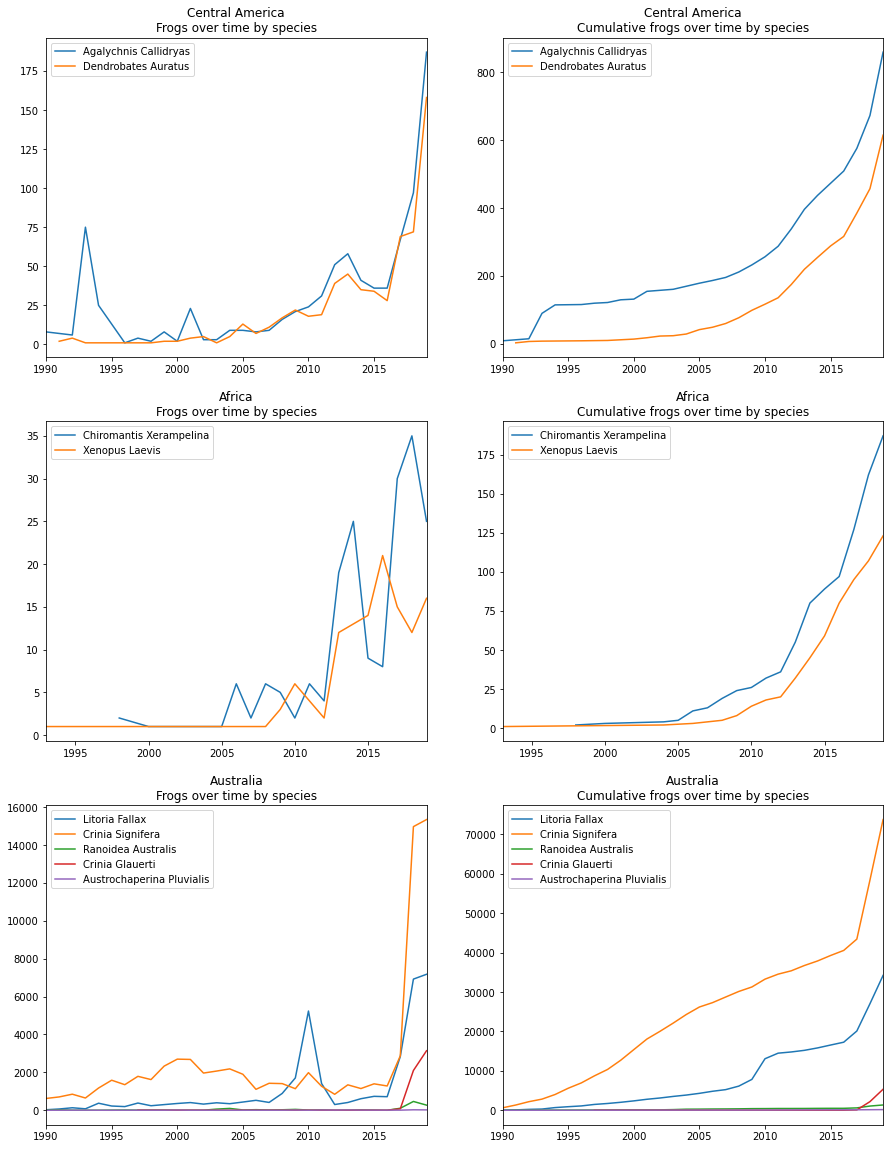

In [17]:
fig, ax = plt.subplots(3, 2, figsize=(15, 20))   
for i, continent in enumerate(frogs_year['continent'].unique()):
    continent_data = frogs_year[frogs_year['continent'] == continent]    
    for species in continent_data['species'].unique():
        plot_data = continent_data[lambda x: x['species'] == species]
        line_data = (plot_data[['eventDate','year']].dropna()
                    .assign(n = 1).groupby('year').sum()
                    .reset_index().sort_values('year')
                    .assign(ncum=lambda x: x.n.cumsum()))
        ax[i, 1].plot(line_data['year'], line_data.ncum, label=species)
        ax[i, 0].plot(line_data['year'], line_data.n, label=species)
    xlim = (continent_data['year'].min(), continent_data['year'].max()) 
    ax[i, 1].legend(loc='upper left')
    ax[i, 1].set_xlim(xlim)
    ax[i, 1].set_title(f"{continent}\nCumulative frogs over time by species")
    ax[i, 0].legend(loc='upper left')
    ax[i, 0].set_xlim(xlim)
    ax[i, 0].set_title(f"{continent}\nFrogs over time by species")

## Spatial Distribution


In [18]:
def plot_species(fig, ax, frog_data, region_name, colourmap=None):
    '''
    
    '''
    # Bar chart
    bar_data = frog_data['species'].value_counts()
    barchart = ax[1].bar(bar_data.index.str.replace(' ', '\n'), bar_data)
    # Colour cycle to ensure colors match in both plots
    if colourmap is None:
        colourmap = {species:colour['color'] for species, colour in zip(frog_data['species'].value_counts().index, cycle(plt.rcParams['axes.prop_cycle']))}
    for i in range(len(bar_data)):
        species_name = bar_data.index[i]
        if len(species_name) > 19:
            display_name = species_name.replace(' ', '\n')
        else:
            display_name = species_name
        barchart[i].set_color(colourmap[species_name])
        barchart[i].set_label(f"{display_name}\nCount: {bar_data[i]}")
        filt = frog_data.species == species_name
        # Scatter plot
        ax[0].scatter(
            frog_data[filt].decimalLongitude, 
            frog_data[filt].decimalLatitude, 
            marker='.', 
            color=colourmap[species_name]
        )
    # Add other features
    ax[0].set_title(f"Frog occurrences for {region_name}")
    ax[0].set_xticklabels([])
    ax[0].set_yticklabels([])
    ax[1].set_title(f"Frog species distribution in {region_name}")
    cx.add_basemap(ax[0], crs={'init':'epsg:4326'}, alpha=0.5) # Add basemap
    ax[1].set_xticklabels(bar_data.index.str.replace(' ', '\n'), rotation=45)
    ax[1].legend()

In [19]:
def plot_barchart(bar_data, ax, colourmap=None, bar_params={}):
    '''
    
    '''
    barchart = ax.bar(bar_data.index, bar_data, **bar_params)
    if colourmap is None:
        prop_cycle = cycle(plt.rcParams['axes.prop_cycle'])
        colourmap = {spec:col['color'] for spec, col in zip(bar_data.index, prop_cycle)}
    for i in range(len(bar_data)):
        var_name = bar_data.index[i]
        barchart[i].set_color(colourmap[var_name])
        barchart[i].set_label(f"{var_name}\nCount: {bar_data[i]}")
    ax.set_xticklabels(bar_data.index.str.replace(' ', '\n'), rotation=45)
    ax.legend()

Text(0.5, 1.0, 'Frog occurrences by continent')

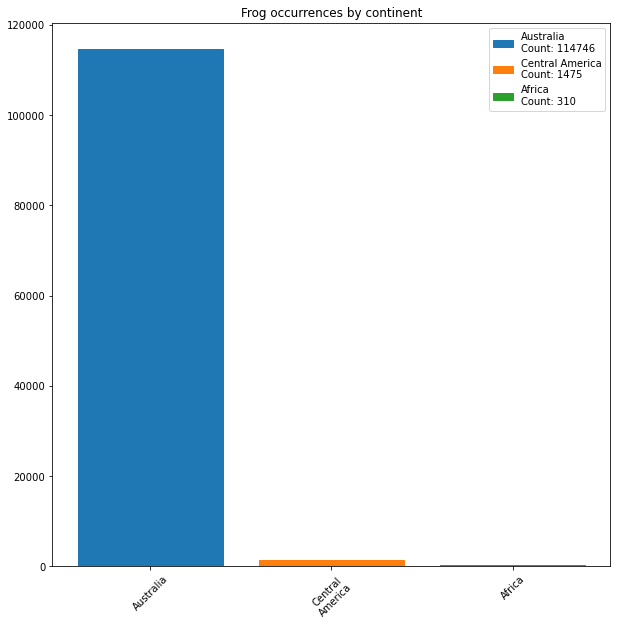

In [20]:
species_colourmap = {species:colour['color'] for species, colour in zip(frogs_year['species'].value_counts().index, cycle(plt.rcParams['axes.prop_cycle']))}
continent_bar_data = frogs_year['continent'].value_counts()
fig, ax = plt.subplots(figsize=(10, 10))
plot_barchart(continent_bar_data, ax)
ax.set_title('Frog occurrences by continent')

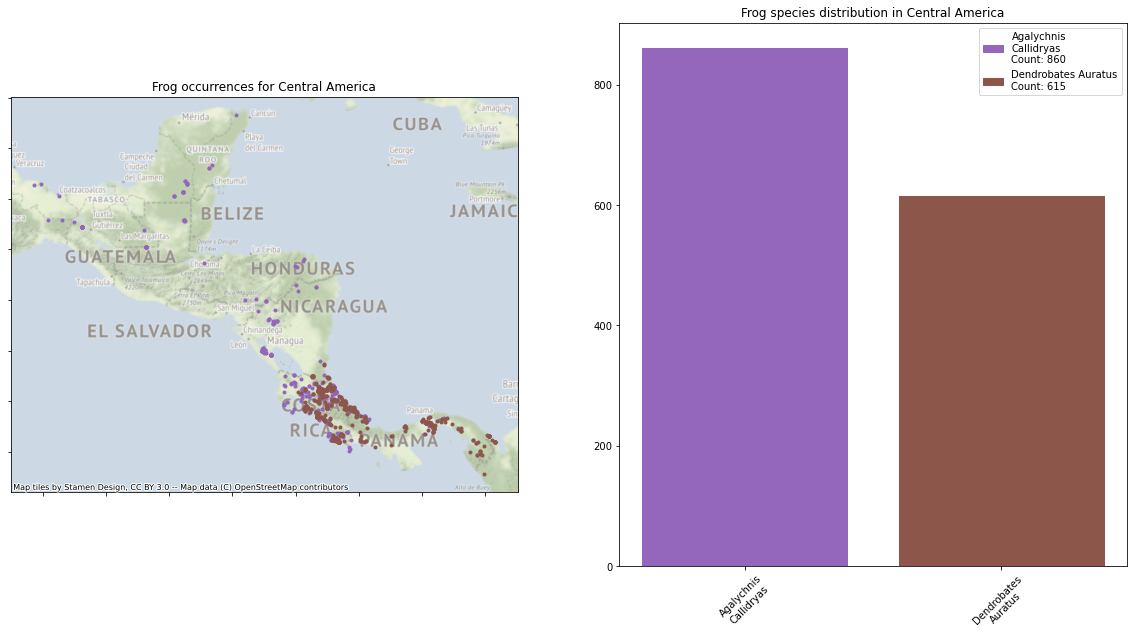

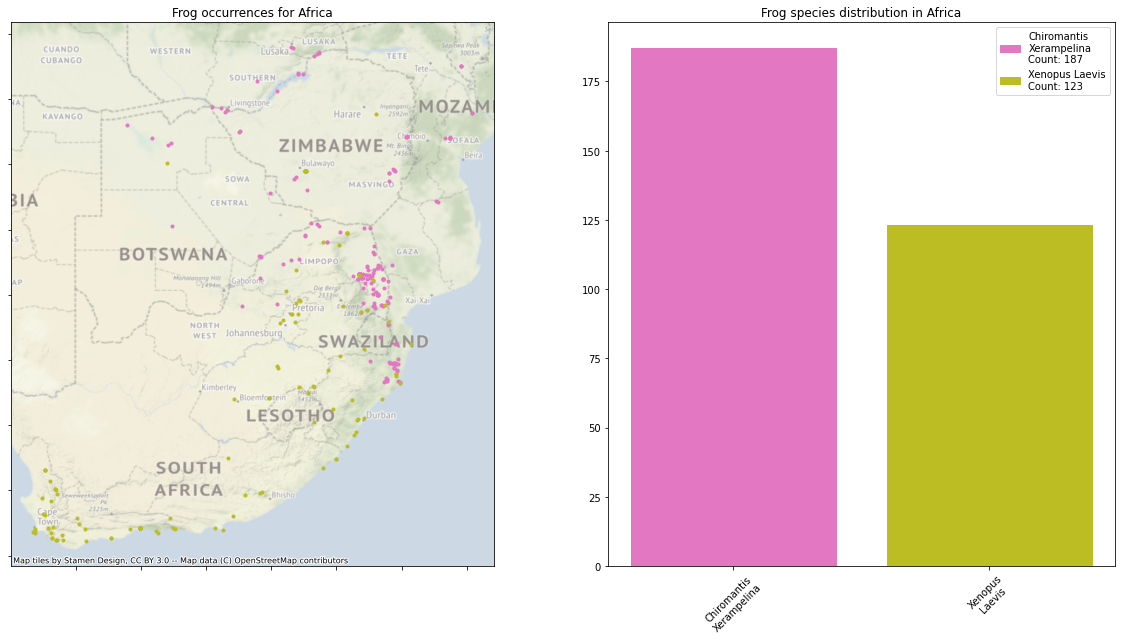

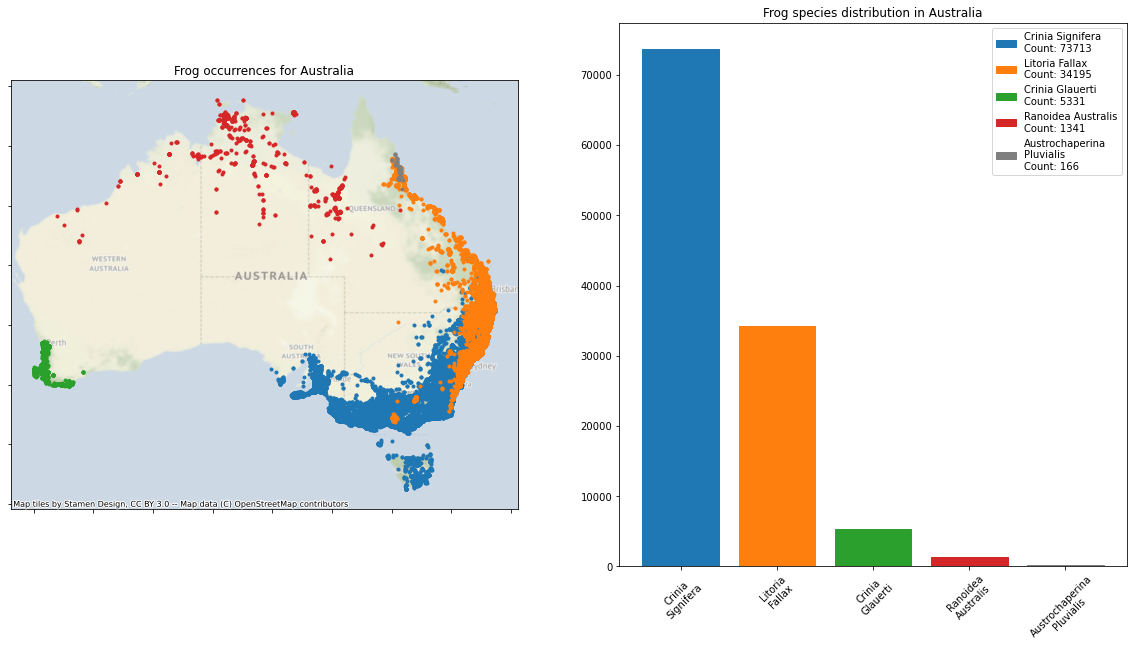

In [21]:
for x, cnt in enumerate(frogs_year['continent'].unique()) :
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    filt = frogs_year['continent'] == cnt
    plot_species(fig, ax[:], frogs_year[filt], cnt, colourmap=species_colourmap)
    plt.show()

In [22]:
Australia_frogs = frogs_year[frogs_year['continent']== 'Australia']
Australia_frogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114746 entries, 7 to 193507
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   gbifID                         114746 non-null  int64         
 1   basisOfRecord                  114746 non-null  object        
 2   eventDate                      114746 non-null  datetime64[ns]
 3   stateProvince                  114746 non-null  object        
 4   decimalLatitude                114746 non-null  float64       
 5   decimalLongitude               114746 non-null  float64       
 6   coordinateUncertaintyInMeters  114746 non-null  float64       
 7   species                        114746 non-null  object        
 8   country                        114746 non-null  object        
 9   continent                      114746 non-null  object        
 10  year                           114746 non-null  float64       
 11  

Text(0.5, 1.0, 'Frog occurrences by state')

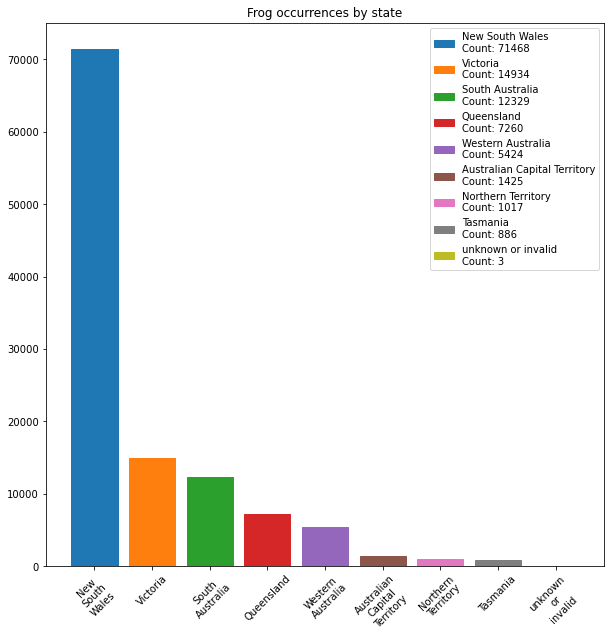

In [23]:
species_colourmap = {species:colour['color'] for species, colour in zip(Australia_frogs['species'].value_counts().index, cycle(plt.rcParams['axes.prop_cycle']))}
state_bar_data = Australia_frogs['stateProvince'].value_counts()
fig, ax = plt.subplots(figsize=(10, 10))
plot_barchart(state_bar_data, ax)
ax.set_title('Frog occurrences by state')

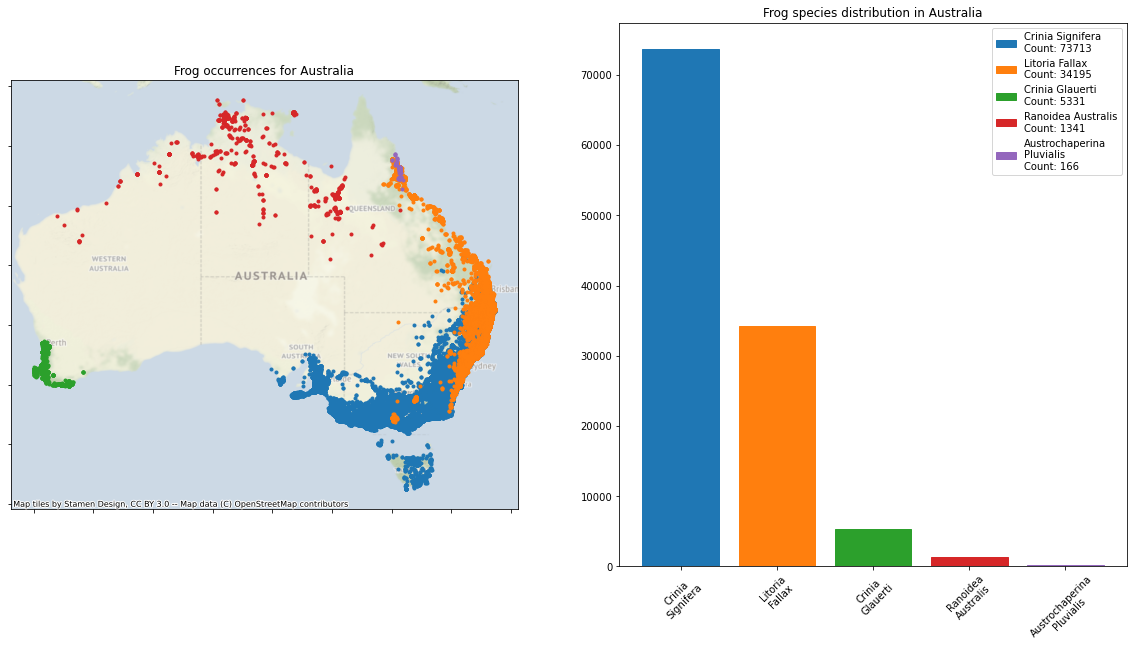

In [24]:
for x, cnt in enumerate(Australia_frogs['continent'].unique()) :
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    filt = Australia_frogs['continent'] == cnt
    plot_species(fig, ax[:], Australia_frogs[filt], cnt, colourmap=species_colourmap)
    plt.show()

In [25]:
Australia_frogs['stateProvince'].value_counts()

New South Wales                 71468
Victoria                        14934
South Australia                 12329
Queensland                       7260
Western Australia                5424
Australian Capital Territory     1425
Northern Territory               1017
Tasmania                          886
unknown or invalid                  3
Name: stateProvince, dtype: int64

In [26]:
Australia_frogs = Australia_frogs[(Australia_frogs['stateProvince']!='unknown or invalid') & (Australia_frogs['stateProvince']!='Jervis Bay Territory')]

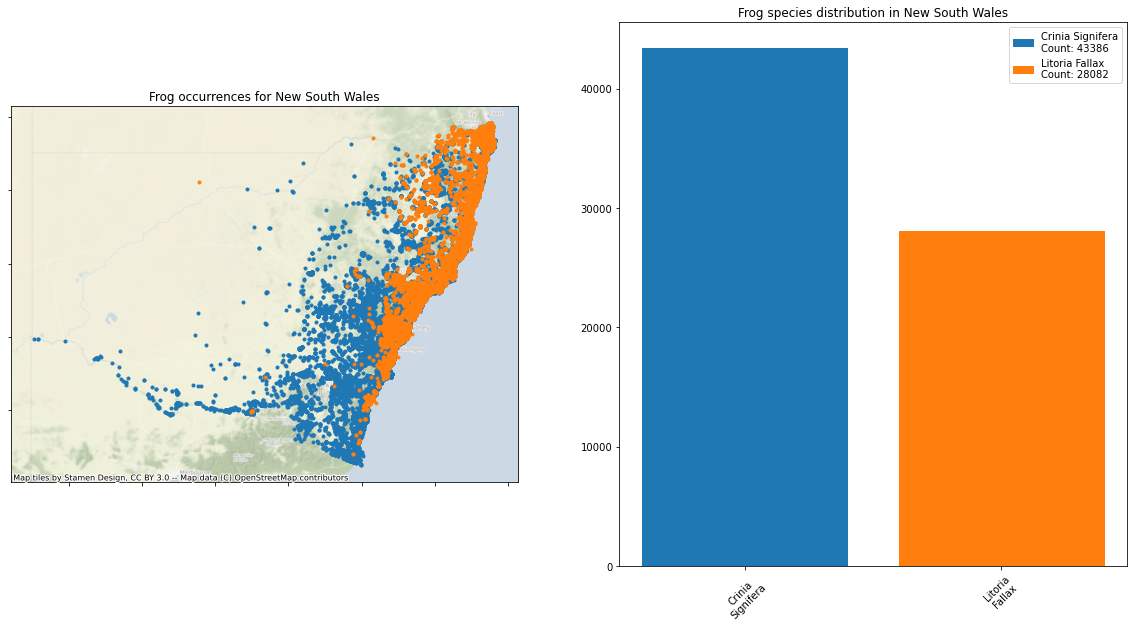

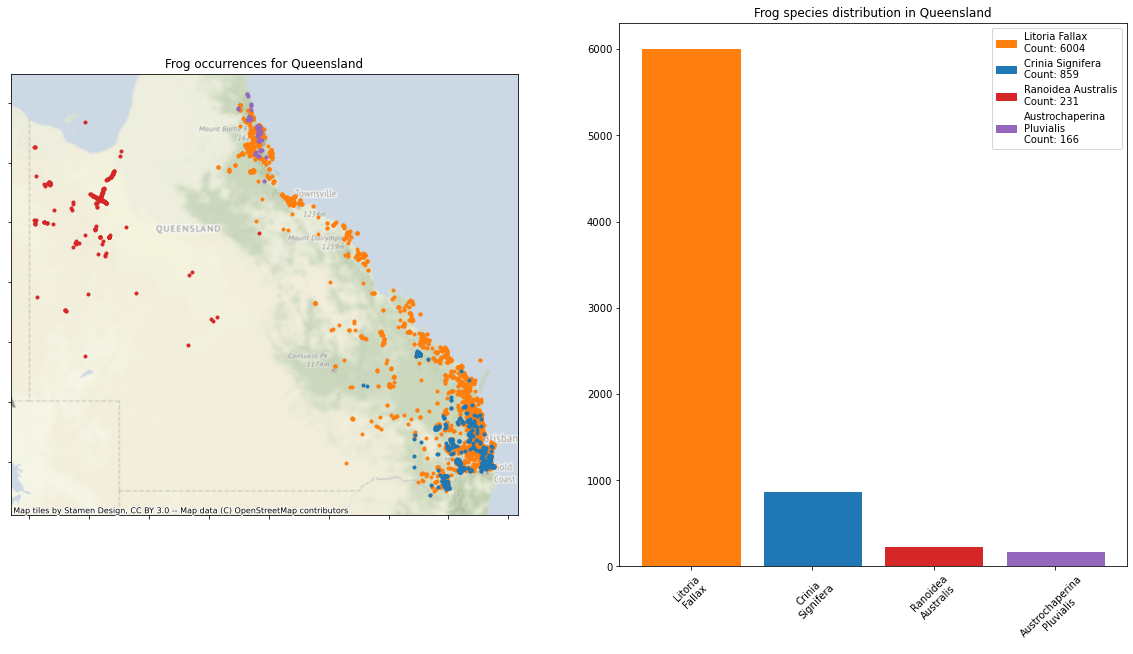

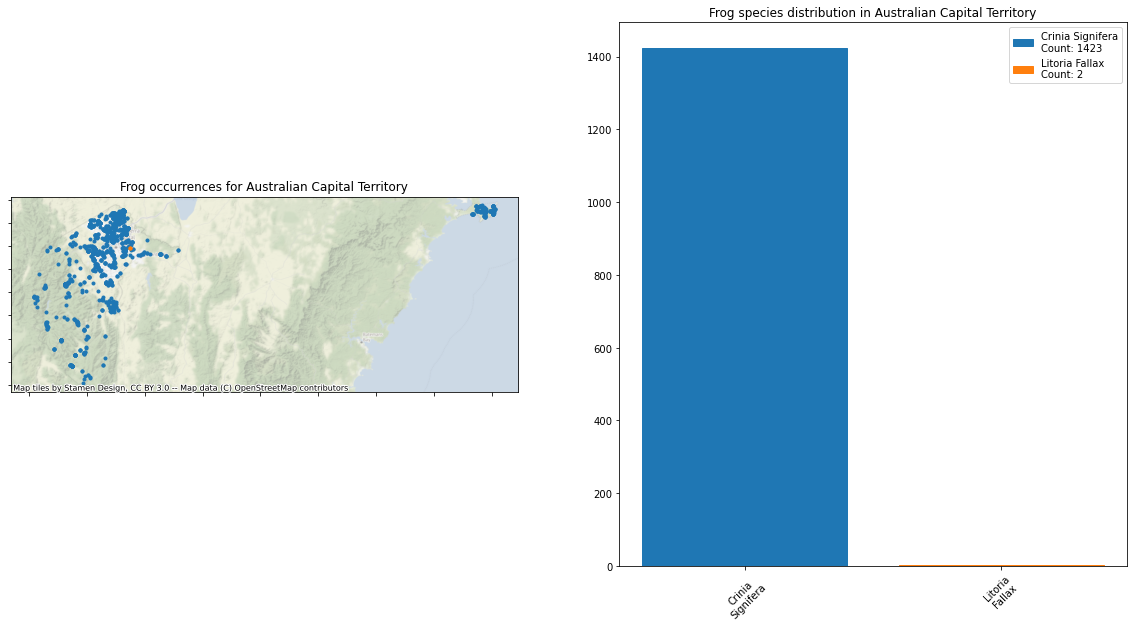

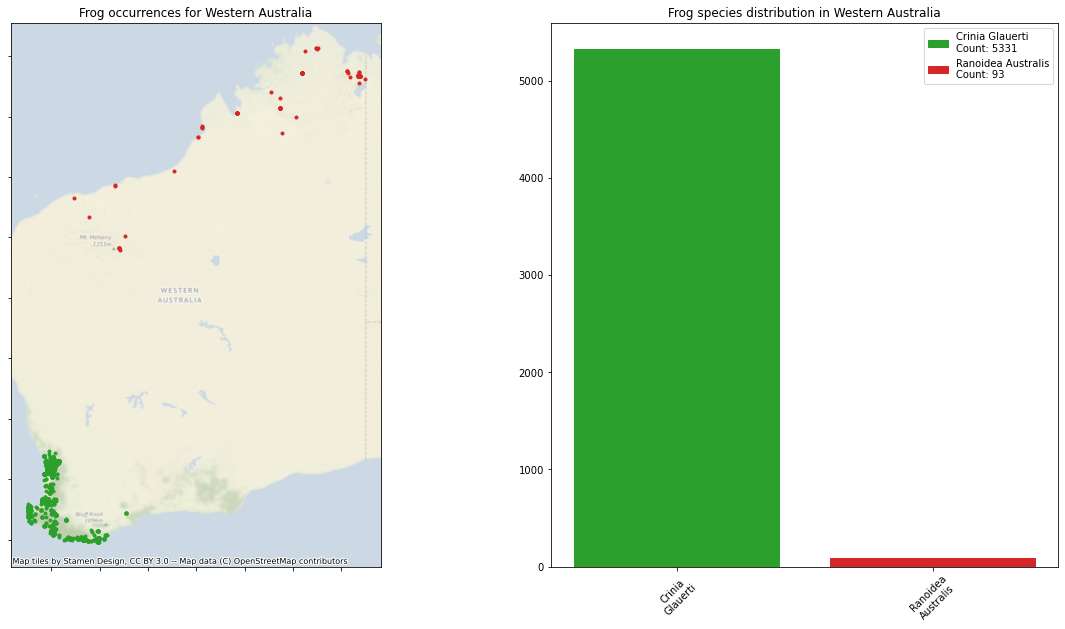

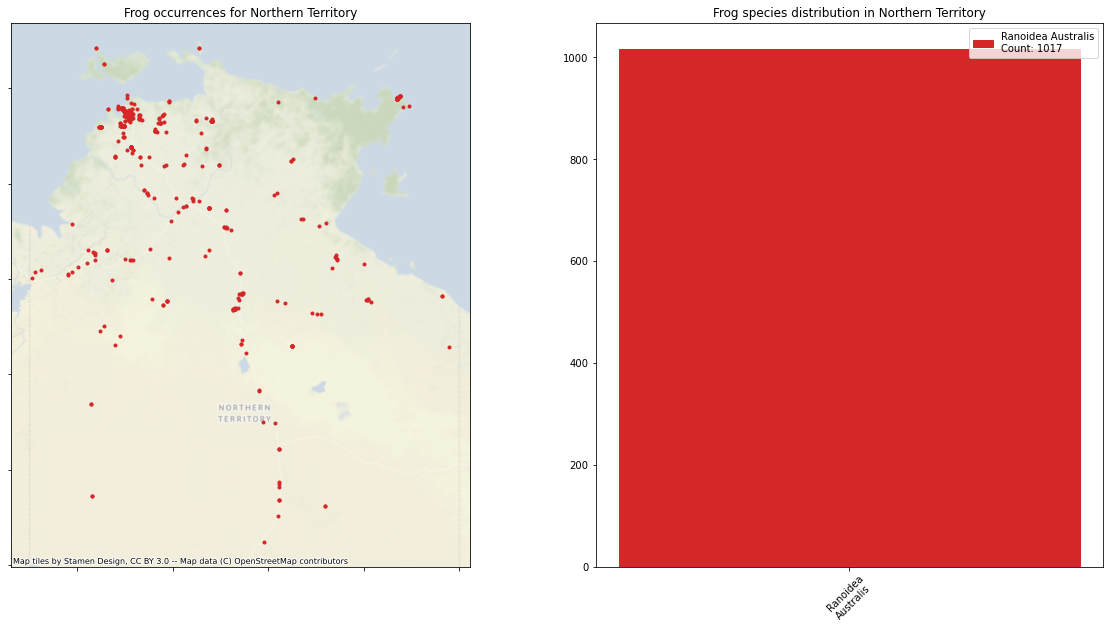

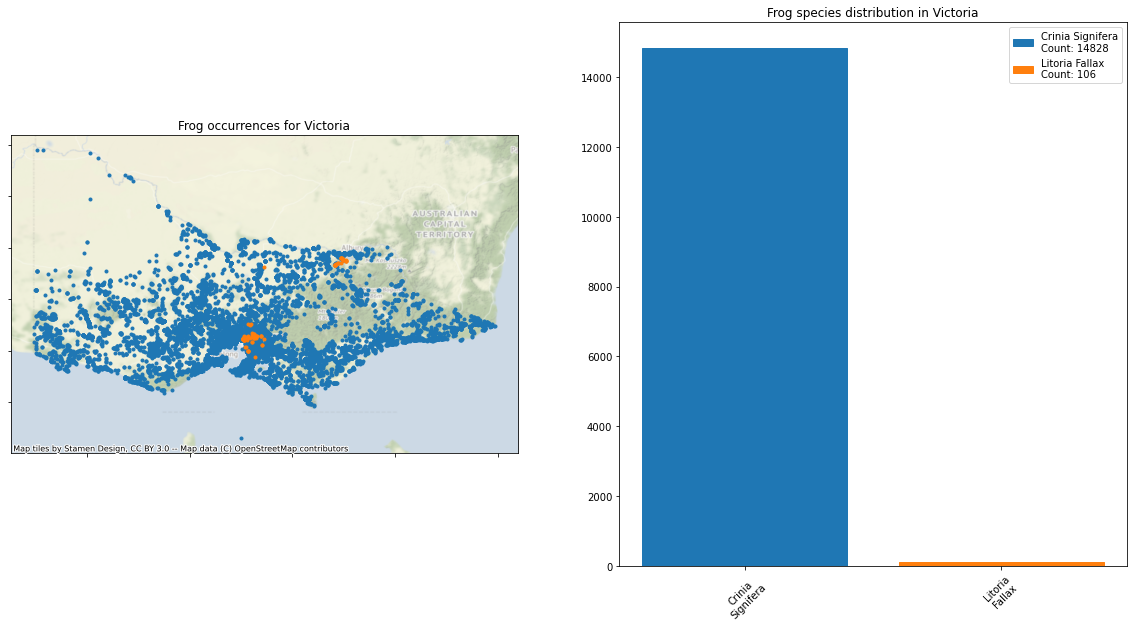

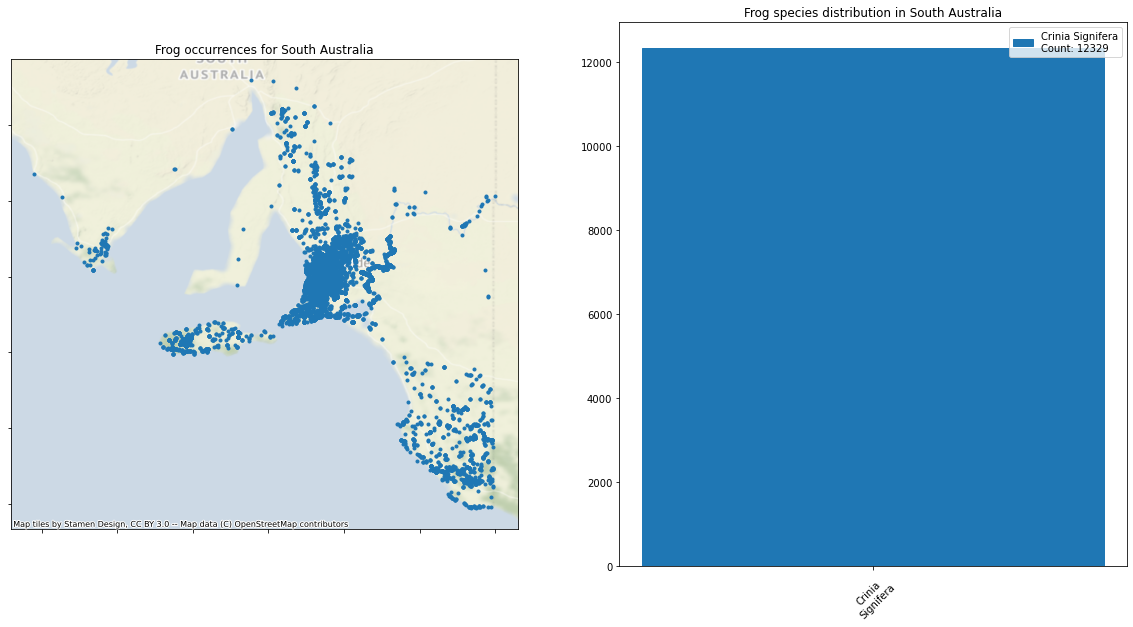

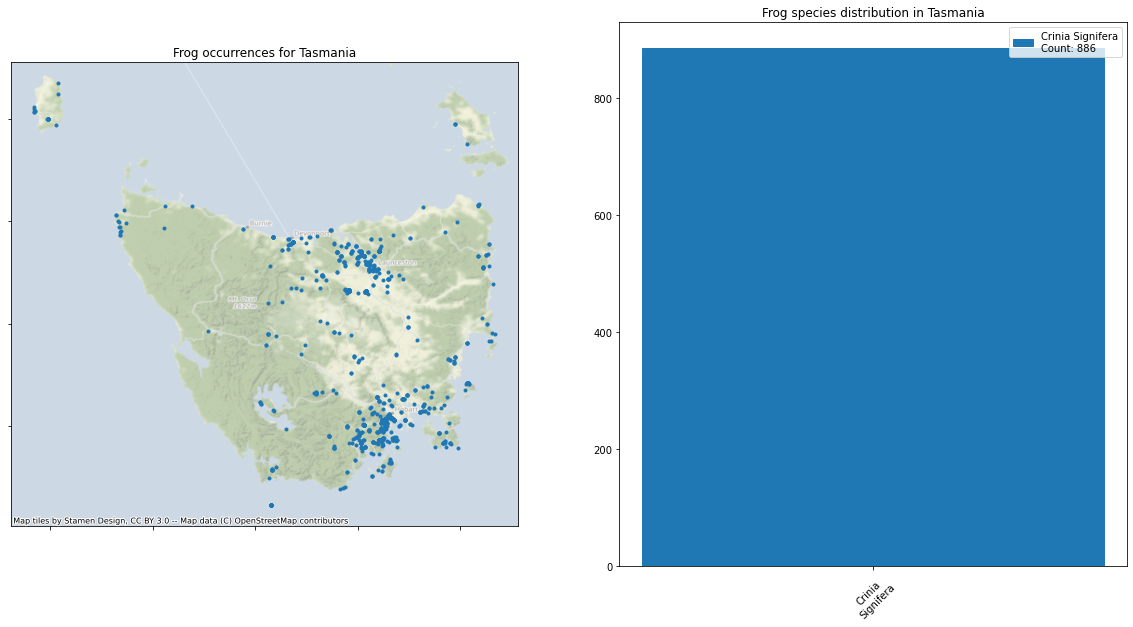

In [27]:
for x, cnt in enumerate(Australia_frogs['stateProvince'].unique()):
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    filt = Australia_frogs['stateProvince'] == cnt
    plot_species(fig, ax[:], Australia_frogs[filt], cnt, colourmap=species_colourmap)
    plt.show()

Create funtion to calculate the minimum and maximum decimalLatitude and decimalLongitude per State 

In [28]:
def latlogsatate (df) :
    """
        This Funtion create the columns: decimalLatitude_min_state',
        'decimalLongitude_min_state', decimalLatitude_max_state',
        'decimalLongitude_max_state', to the imput datafame claculating 
        the minimun an maximun    
    """
    latlong = pd.DataFrame()
    for state in df['stateProvince'].unique() :
        Min = df[['stateProvince','decimalLatitude','decimalLongitude']].groupby('stateProvince',as_index=False).min()
        Max = df[['stateProvince','decimalLatitude','decimalLongitude']].groupby('stateProvince',as_index=False).max()
        latlongstate = Min.merge(Max, on=['stateProvince'],how ='inner', suffixes=('_min_state','_max_state'))
    latlong = latlong.append(latlongstate)
    dflatlong = df.join(latlong.set_index('stateProvince'), how='inner', on='stateProvince',sort=False)
    return dflatlong

In [29]:
Australia_latlong_frogs = latlogsatate(Australia_frogs)
Australia_latlong_frogs

,gbifID,basisOfRecord,eventDate,stateProvince,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,species,country,continent,year,month,decimalLatitude_min_state,decimalLongitude_min_state,decimalLatitude_max_state,decimalLongitude_max_state
7,1944370584,Human_Observation,2018-04-18 19:05:00,New South Wales,-33.693144,151.320884,28930.0,Litoria Fallax,Australia,Australia,2018.0,4.0,-37.502812,141.045033,-28.159902,153.636442
17,2423011701,Human_Observation,2019-08-28 09:24:00,New South Wales,-33.925746,151.164082,4.0,Litoria Fallax,Australia,Australia,2019.0,8.0,-37.502812,141.045033,-28.159902,153.636442
21,2236299662,Human_Observation,2018-02-13 23:02:00,New South Wales,-31.732415,152.088515,29199.0,Litoria Fallax,Australia,Australia,2018.0,2.0,-37.502812,141.045033,-28.159902,153.636442
58,1100413278,Preserved_Specimen,1993-01-01 00:00:00,New South Wales,-28.771660,152.302220,100.0,Crinia Signifera,Australia,Australia,1993.0,1.0,-37.502812,141.045033,-28.159902,153.636442
62,1100438272,Preserved_Specimen,2002-03-28 00:00:00,New South Wales,-33.683000,149.200000,10000.0,Crinia Signifera,Australia,Australia,2002.0,3.0,-37.502812,141.045033,-28.159902,153.636442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139072,1272142204,Machine_Observation,1993-01-30 00:00:00,Tasmania,-43.766700,146.150000,1000.0,Crinia Signifera,Australia,Australia,1993.0,1.0,-43.766700,143.839421,-39.656100,148.339101
139106,1272141320,Machine_Observation,1993-01-25 00:00:00,Tasmania,-43.766700,146.150000,1000.0,Crinia Signifera,Australia,Australia,1993.0,1.0,-43.766700,143.839421,-39.656100,148.339101
139118,1272141615,Machine_Observation,1993-01-22 00:00:00,Tasmania,-43.766700,146.150000,1000.0,Crinia Signifera,Australia,Australia,1993.0,1.0,-43.766700,143.839421,-39.656100,148.339101
139201,1272138998,Machine_Observation,1993-01-26 00:00:00,Tasmania,-43.766700,146.150000,1000.0,Crinia Signifera,Australia,Australia,1993.0,1.0,-43.766700,143.839421,-39.656100,148.339101


The frog species to identified is Litoria fallax, for this reason we created the column Species_status to 1 for the target species and 0 for all other species.

In [30]:
Australia_frogs['Litoria_fallax_status'] = Australia_frogs['species'].apply(lambda x: np.where(x == 'Litoria Fallax', 1, 0))
Australia_frogs

,gbifID,basisOfRecord,eventDate,stateProvince,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,species,country,continent,year,month,Litoria_fallax_status
7,1944370584,Human_Observation,2018-04-18 19:05:00,New South Wales,-33.693144,151.320884,28930.0,Litoria Fallax,Australia,Australia,2018.0,4.0,1
8,1500319380,Human_Observation,2009-07-28 17:16:00,Queensland,-27.888019,153.309342,20674.0,Litoria Fallax,Australia,Australia,2009.0,7.0,1
17,2423011701,Human_Observation,2019-08-28 09:24:00,New South Wales,-33.925746,151.164082,4.0,Litoria Fallax,Australia,Australia,2019.0,8.0,1
21,2236299662,Human_Observation,2018-02-13 23:02:00,New South Wales,-31.732415,152.088515,29199.0,Litoria Fallax,Australia,Australia,2018.0,2.0,1
40,2456512415,Human_Observation,2016-04-17 11:12:00,Queensland,-27.476426,152.977687,278.0,Litoria Fallax,Australia,Australia,2016.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193485,2806356042,Human_Observation,2010-12-17 00:00:00,New South Wales,-33.835933,151.062409,100.0,Litoria Fallax,Australia,Australia,2010.0,12.0,1
193486,3108865868,Human_Observation,2019-02-03 00:00:00,New South Wales,-34.028797,151.225626,6.0,Litoria Fallax,Australia,Australia,2019.0,2.0,1
193487,1452024720,Human_Observation,2014-03-26 00:00:00,New South Wales,-32.723173,151.110442,20.0,Crinia Signifera,Australia,Australia,2014.0,3.0,0
193488,1070185943,Human_Observation,2009-06-09 00:00:00,New South Wales,-33.235855,151.412156,50.0,Litoria Fallax,Australia,Australia,2009.0,6.0,1


Save the Resulting Dataset in a csv File  

In [31]:
Australia_frogs.to_csv('Australia_frogs.csv')